In this notebook we will be checking Steam game data (up to Oct. 2024). 
Main questions and key points that I will try to answer: 

1. ✅ Do higher user scores correlate with more estimated owners?
2. ✅ Did certain years see a surge in high-rated games?
3. ✅ Which years had the highest number of game releases?
4. ✅ What game has most positive review (per each release year)? 
5. ✅ Is it possible that games with most positive reviews also might have most negative ones too? 
6. ✅ Price comparison of games per their release year. 
7. ✅ Does price affect estimate owner numbers? 
8. ✅ What are the most common genre combinations?
9. ✅ How does estimated ownership vary across genres?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

Checking the data

In [2]:
steam_games = pd.read_csv("games.csv")

steam_games.head(2)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Estimated owners            111452 non-null  object 
 4   Peak CCU                    111452 non-null  int64  
 5   Required age                111452 non-null  int64  
 6   Price                       111452 non-null  float64
 7   Discount                    111452 non-null  int64  
 8   DLC count                   111452 non-null  int64  
 9   About the game              104969 non-null  object 
 10  Supported languages         111452 non-null  object 
 11  Full audio languages        111452 non-null  object 
 12  Reviews                     10624 non-null   object 
 13  Header image  

In [4]:
print(steam_games.columns.tolist())

['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'Discount', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']


![advisory_gif](advisory.gif)

In [5]:
parental_advisory = steam_games.loc[steam_games['Required age'] >= 18].shape[0]

print("Number of games requiring 18 years of age:", parental_advisory)

Number of games requiring 18 years of age: 362


In [6]:
filtered_free_ones = steam_games.loc[(steam_games['Required age'] >= 18) & (steam_games['Price'] == 0)].shape[0]

print("Number of games requiring 18 years of age and taat are free:", filtered_free_ones)

Number of games requiring 18 years of age and taat are free: 50


Adjusting some columns to numerical

In [7]:
def parse_mixed_dates(date_str):
    try:
        return pd.to_datetime(date_str, format='%b %d, %Y')
    except:
        try:
            return pd.to_datetime(date_str, format='%b %Y')
        except:
            return pd.NaT

steam_games['Release date'] = steam_games['Release date'].apply(parse_mixed_dates)
steam_games['Release year'] = steam_games['Release date'].dt.year

In [8]:
def convert_owner_range_to_upper(x):
    try:
        parts = x.split('-')
        return int(parts[1])
    except:
        return None

steam_games['Estimated owners (upper)'] = steam_games['Estimated owners'].apply(convert_owner_range_to_upper)

In [9]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   AppID                       111452 non-null  int64         
 1   Name                        111446 non-null  object        
 2   Release date                111452 non-null  datetime64[ns]
 3   Estimated owners            111452 non-null  object        
 4   Peak CCU                    111452 non-null  int64         
 5   Required age                111452 non-null  int64         
 6   Price                       111452 non-null  float64       
 7   Discount                    111452 non-null  int64         
 8   DLC count                   111452 non-null  int64         
 9   About the game              104969 non-null  object        
 10  Supported languages         111452 non-null  object        
 11  Full audio languages        111452 non-

In [10]:
#missing_years = steam_games[steam_games['Release year'].isna()]
#print(missing_years[['Name', 'Release date', 'Release year']])

Pairplotting

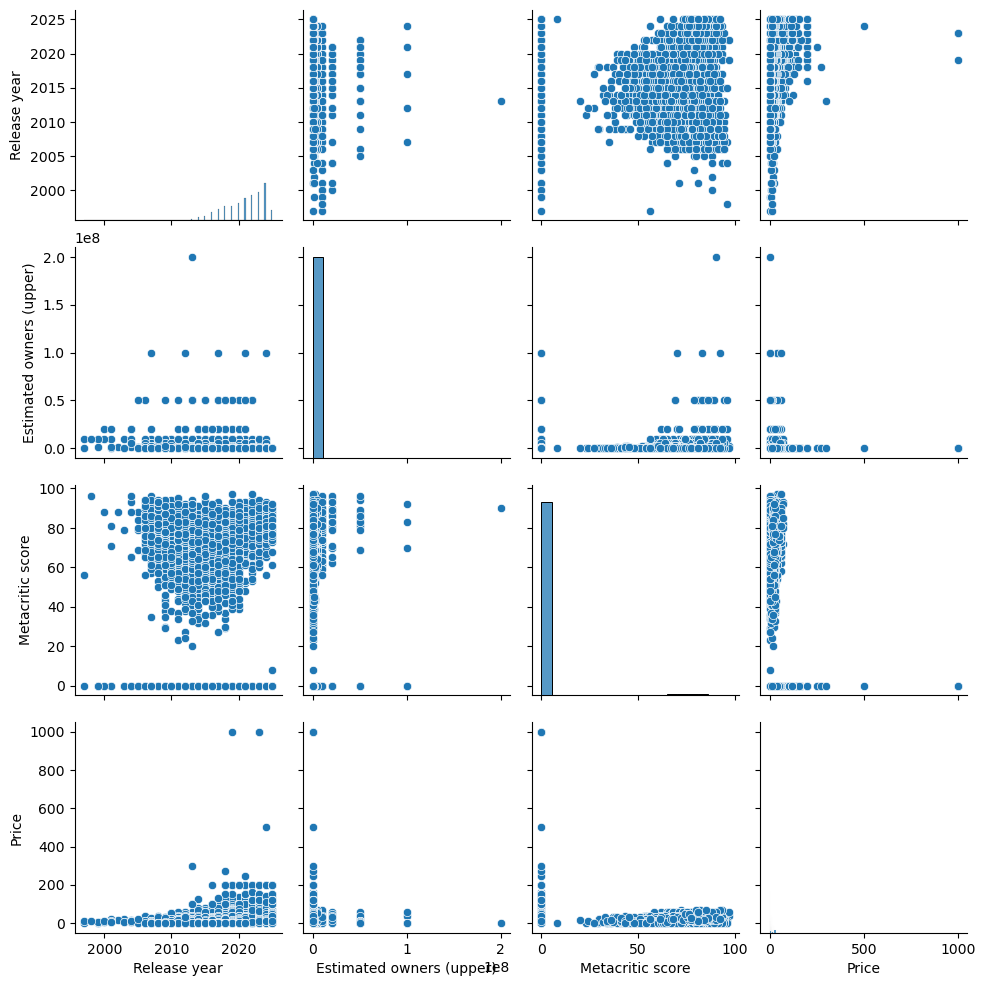

In [11]:
steam_games_correlations = steam_games[['Release year', 'Estimated owners (upper)', 'Metacritic score','Price']]

sns.pairplot(steam_games_correlations)

User scores correlation with estimate owners vs metacritic score with estoimate owners correlation coefficient. 

In [12]:
user_owner = steam_games[['User score', 'Estimated owners (upper)']].dropna()

correlation = user_owner['User score'].corr(user_owner['Estimated owners (upper)'])

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.0009799461703904437


Release year and metacritic score average + overall games released each year. 

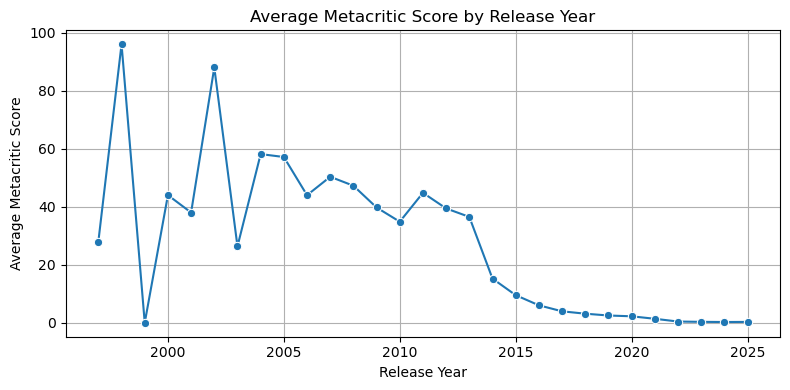

In [13]:
year_score = steam_games[['Release year', 'Metacritic score']].dropna()

yearly_avg = year_score.groupby('Release year').mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(x='Release year', y='Metacritic score', data=yearly_avg, marker='o')
plt.title('Average Metacritic Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Metacritic Score')
plt.grid(True)
plt.tight_layout()
plt.show()

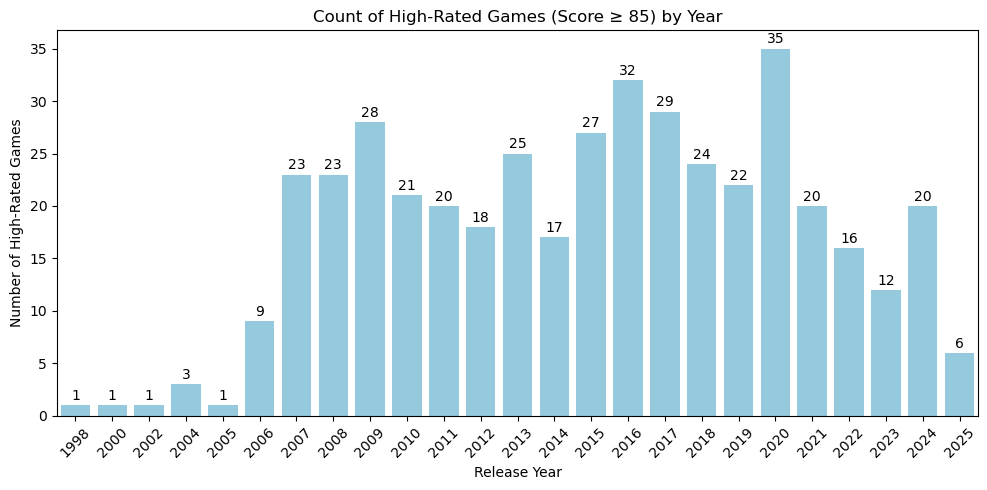

In [14]:
high_rated = steam_games[steam_games['Metacritic score'] >= 85]

high_rated_by_year = high_rated.groupby('Release year').size().reset_index(name='High-rated games')

plt.figure(figsize=(10, 5))

ax = sns.barplot(x='Release year', y='High-rated games', data=high_rated_by_year, color='skyblue')

for index, row in high_rated_by_year.iterrows():
    ax.text(x=index, y=row['High-rated games'] + 0.5, s=row['High-rated games'], ha='center')
    
plt.title('Count of High-Rated Games (Score ≥ 85) by Year')
plt.xticks(rotation=45)
plt.xlabel('Release Year')
plt.ylabel('Number of High-Rated Games')
plt.tight_layout()
plt.show()

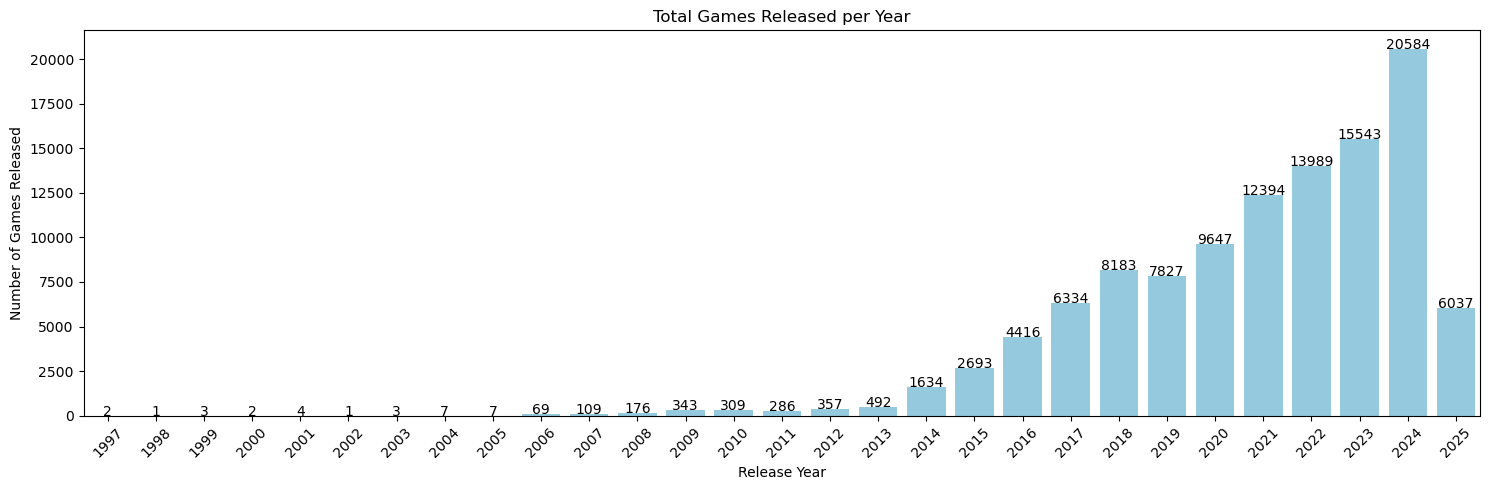

In [15]:
total_games_by_year = steam_games.groupby('Release year').size().reset_index(name='Total games')

plt.figure(figsize=(15,5))
ax = sns.barplot(x='Release year', y='Total games', data=total_games_by_year, color='skyblue')

for index, row in total_games_by_year.iterrows():
    ax.text(x=index, y=row['Total games'] + 0.5, s=int(row['Total games']), ha='center')

plt.title('Total Games Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
num_scored_games = steam_games[
    (steam_games['Metacritic score'].notna()) & 
    (steam_games['Metacritic score'] > 0)]['Name'].nunique()

total_games = steam_games['Name'].nunique()

print(f"Number of distinct games with valid Metacritic score (> 0): {num_scored_games}")
print(f"Total number of distinct games in dataset: {total_games}")

Number of distinct games with valid Metacritic score (> 0): 3934
Total number of distinct games in dataset: 110325


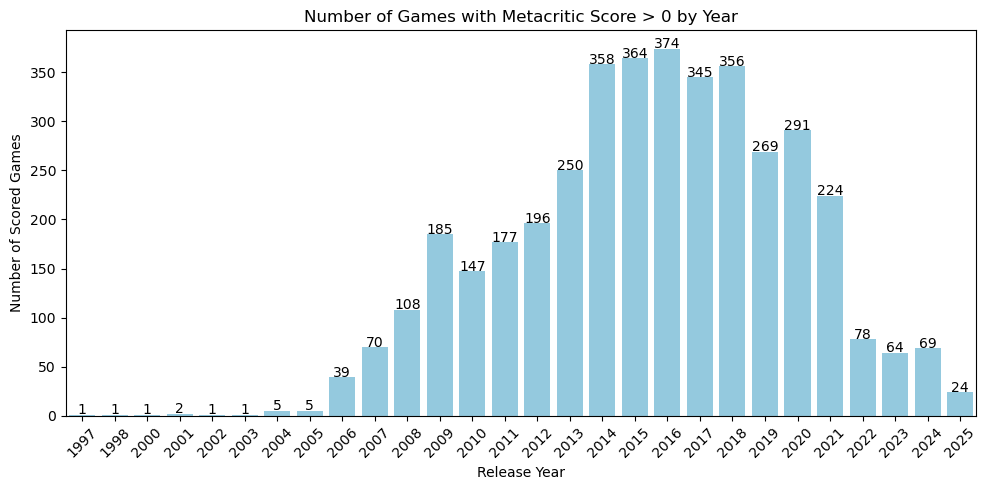

In [17]:
scored_games_by_year = steam_games[
    (steam_games['Metacritic score'].notna()) &
    (steam_games['Metacritic score'] > 0)
].groupby('Release year').size().reset_index(name='Count')

scored_games_by_year = scored_games_by_year.sort_values('Release year')

plt.figure(figsize=(10, 5))

ax = sns.barplot(data=scored_games_by_year, x='Release year', y='Count', color='skyblue')

for index, row in scored_games_by_year.iterrows():
    ax.text(x=index, y=row['Count'] + 0.5, s=int(row['Count']), ha='center')

plt.title('Number of Games with Metacritic Score > 0 by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Scored Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Explanation on why this data is not sufficient to understand if game is good or popular and I will not continue looking into metacritic scores. 

1. Steam stopped showing Metacritic scores after ~2019
Steam used to pull scores from Metacritic and show them on game pages.
Around 2019, Steam removed this integration - possibly due to criticism of Metacritic's influence or reliability.

2. Not every game gets a Metacritic score
Metacritic only includes professional critic reviews.
Many indie games, early access titles, or niche releases don’t get reviewed by enough outlets to qualify.

3. Steam metadata may be incomplete
Even when a game has a Metacritic score on the web, Steam might never have added the Metacritic ID to their backend, so:
It won't appear on Steam pages or via the Steam API.

4. Platform mismatch
Metacritic scores are platform-specific.

Why later games have this data: 
Some have it due to prerelease setting, some have due to legacies or high profile contracts and etc. 

Top rated game from each available year by positive reviews count

In [18]:
steam_games['Release year'] = steam_games['Release date'].dt.year

filtered = steam_games.dropna(subset=['Positive'])

filtered_sorted = filtered.sort_values(['Release year', 'Positive'], ascending=[True, False])

best_games_per_year = filtered_sorted.drop_duplicates(subset='Release year', keep='first')

result = best_games_per_year[['Release year', 'Name', 'Positive']]

print(result.sort_values('Release year'))

        Release year                              Name  Positive
22217           1997                            POSTAL      4806
49557           1998                         Half-Life     73346
39055           1999         Half-Life: Opposing Force     14333
39428           2000                    Counter-Strike    198387
50362           2001             Half-Life: Blue Shift     10256
11743           2002                             Mafia      6124
3636            2003                     Day of Defeat      5179
36775           2004                       Half-Life 2    142368
6485            2005           Gothic II: Gold Edition      9334
1289            2006                       Garry's Mod    822326
30583           2007                   Team Fortress 2    823693
77674           2008     Grand Theft Auto: San Andreas     73138
39530           2009                     Left 4 Dead 2    619457
11843           2010       Sid Meier's Civilization® V    178687
46416           2011     

Do games that have most positive rveiews also have most negatove reviews too? 

In [19]:
top_positive = steam_games.sort_values('Positive', ascending=False).head(10)

print("Top 10 games with most Positive reviews:")
print(top_positive[['Name', 'Positive', 'Negative']])

Top 10 games with most Positive reviews:
                                   Name  Positive  Negative
46158  Counter-Strike: Global Offensive   5764420    766677
17585                            Dota 2   1477153    300437
57205                Grand Theft Auto V   1171197    210154
8885                PUBG: BATTLEGROUNDS   1154655    895978
46416                          Terraria    964983     21044
8256    Tom Clancy's Rainbow Six® Siege    929372    138530
30583                   Team Fortress 2    823693     56683
1289                        Garry's Mod    822326     29004
35001                              Rust    703687    108223
96948                Black Myth: Wukong    663109     28700


In [20]:
top_negative = steam_games.sort_values('Negative', ascending=False).head(10)
print("\nTop 10 games with most Negative reviews:")
print(top_negative[['Name', 'Positive', 'Negative']])


Top 10 games with most Negative reviews:
                                   Name  Positive  Negative
8885                PUBG: BATTLEGROUNDS   1154655    895978
46158  Counter-Strike: Global Offensive   5764420    766677
17585                            Dota 2   1477153    300437
57205                Grand Theft Auto V   1171197    210154
8256    Tom Clancy's Rainbow Six® Siege    929372    138530
8009                     Cyberpunk 2077    391643    129925
40479                  Dead by Daylight    494648    112924
35001                              Rust    703687    108223
61097                 Battlefield™ 2042     39121    106038
3233              鬼谷八荒 Tale of Immortal    105384    103661


Pairplot was owherwhelmed by reviews, thus I counted coefficient instead. There is a strong correlation. 

In [21]:
correlation = steam_games[['Positive', 'Negative']].corr().loc['Positive', 'Negative']
print(f"Correlation coefficient between Positive and Negative reviews: {correlation:.3f}")

Correlation coefficient between Positive and Negative reviews: 0.782


Price median comparison through out the yrars -  all games vs paid games only

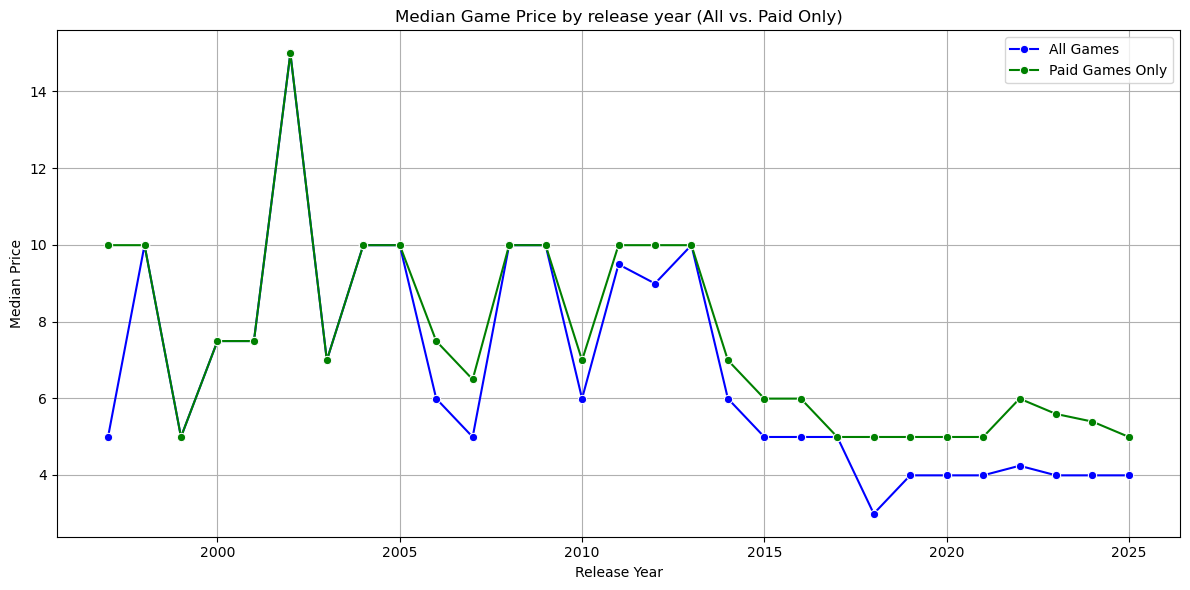

In [22]:
steam_games['Release year'] = pd.to_datetime(steam_games['Release date'], errors='coerce').dt.year

steam_games = steam_games.dropna(subset=['Release year', 'Price'])

median_all = steam_games.groupby('Release year')['Price'].median().reset_index()
median_all.rename(columns={'Price': 'Median All'}, inplace=True)

paid_games = steam_games[steam_games['Price'] > 0]
median_paid = paid_games.groupby('Release year')['Price'].median().reset_index()
median_paid.rename(columns={'Price': 'Median Paid'}, inplace=True)

median_combined = pd.merge(median_all, median_paid, on='Release year', how='inner')

plt.figure(figsize=(12, 6))
sns.lineplot(data=median_combined, x='Release year', y='Median All', label='All Games', marker='o', color='blue')
sns.lineplot(data=median_combined, x='Release year', y='Median Paid', label='Paid Games Only', marker='o', color='green')

plt.title('Median Game Price by release year (All vs. Paid Only)')
plt.xlabel('Release Year')
plt.ylabel('Median Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
steam_games['Release year'] = pd.to_datetime(steam_games['Release date']).dt.year

highest_price = steam_games.groupby('Release year')['Price'].idxmax()

highest_price_games_per_year = steam_games.loc[highest_price]

result = highest_price_games_per_year[['Release year', 'Name', 'Price']].sort_values('Release year')

print(tabulate(result, headers='keys', tablefmt='pretty', showindex=False))

+--------------+------------------------------------------------------+--------+
| Release year |                         Name                         | Price  |
+--------------+------------------------------------------------------+--------+
|     1997     |                 Carmageddon Max Pack                 |  9.99  |
|     1998     |                      Half-Life                       |  9.99  |
|     1999     |                Team Fortress Classic                 |  4.99  |
|     2000     |                    Counter-Strike                    |  9.99  |
|     2001     |                     Geneforge 1                      | 19.99  |
|     2002     |                        Mafia                         | 14.99  |
|     2003     |                     Geneforge 2                      | 19.99  |
|     2004     |   Unreal Tournament 2004: Editor's Choice Edition    | 14.99  |
|     2005     |                     Geneforge 3                      | 19.99  |
|     2006     |            

Looking at the median it seems that games might not have become more expensive, but as we looked into it in previous table - now there are much more games being released which distort the median. 
Comparing the curent price of highest priced games per their year of release - will also be insufficient as ib example Half life had an average price of 49$ when it came out in 1998, but now it costs 9.99 - this means that games get cheper in time and current price data will not prove if nowardays games are more expensive. 

Estimated owners count per price group

In [24]:
bins = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
labels = [
    '0 - 1',
    '1 - 5',
    '5 - 10',
    '10 - 20',
    '20 - 30',
    '30 - 40',
    '40 - 50',
    '50 - 60',
    '60 - 70',
    '70 - 80',
    '80 - 90',
    '90 - 100',
    '100+']

steam_games['Price Bin'] = pd.cut(steam_games['Price'], bins=bins, labels=labels, include_lowest=True, right=False)

grouped_price = steam_games.groupby('Price Bin', observed=True).agg(
    Total_Games=('Estimated owners (upper)', 'count'),
    Total_Owners=('Estimated owners (upper)', 'sum'),)

grouped_price['Owner rate'] = (grouped_price['Total_Owners'] / grouped_price['Total_Games']).apply(lambda x: f"{x:,.0f}")

print(grouped_price)

           Total_Games  Total_Owners Owner rate
Price Bin                                      
0 - 1            33376    3469410000    103,949
1 - 5            33783    1547730000     45,814
5 - 10           22961    1734110000     75,524
10 - 20          15906    2232900000    140,381
20 - 30           3160     859090000    271,864
30 - 40           1006     495530000    492,575
40 - 50            421     147280000    349,834
50 - 60            414     425320000  1,027,343
60 - 70            116      35190000    303,362
70 - 80             31        670000     21,613
80 - 90             16        260000     16,250
90 - 100            35        920000     26,286
100+               227       3160000     13,921


In [25]:
genres_series = steam_games['Genres']

genre_counts = genres_series.value_counts()

print("Total distinct genres:", genre_counts.shape[0])
print("Top 20 genres:")
print((genre_counts).head(20))

Total distinct genres: 3157
Top 20 genres:
Genres
Casual,Indie                     6240
Action,Indie                     5172
Action,Adventure,Indie           4578
Adventure,Indie                  3898
Adventure,Casual,Indie           3268
Casual                           3190
Indie                            3146
Action,Casual,Indie              3070
Action                           2866
Adventure                        1954
Casual,Indie,Strategy            1892
Action,Adventure,Casual,Indie    1757
Casual,Indie,Simulation          1747
Action,Adventure                 1505
Adventure,Casual                 1447
Adventure,Indie,RPG              1389
Action,Adventure,Indie,RPG       1285
Strategy                         1259
Simulation                       1126
RPG                              1025
Name: count, dtype: int64


In [26]:
top_20_genres = genre_counts.head(20).index.tolist()

filtered = steam_games[steam_games['Genres'].isin(top_20_genres)]

ownership_by_combo = filtered.groupby('Genres')['Estimated owners (upper)'].sum().sort_values(ascending=False)

print("Total Estimated Owners for Top 20 Genres:")
print(ownership_by_combo)

Total Estimated Owners for Top 20 Genres:
Genres
Action                           1173230000
Action,Adventure                  505360000
Action,Indie                      341070000
Action,Adventure,Indie            323570000
Strategy                          272100000
Adventure,Indie                   263890000
RPG                               220960000
Casual,Indie                      192830000
Action,Adventure,Indie,RPG        186260000
Action,Casual,Indie               153360000
Adventure,Casual,Indie            149920000
Adventure                         141800000
Casual                            131770000
Indie                             126800000
Adventure,Indie,RPG                79760000
Simulation                         79090000
Action,Adventure,Casual,Indie      72140000
Casual,Indie,Strategy              63100000
Casual,Indie,Simulation            60870000
Adventure,Casual                   44380000
Name: Estimated owners (upper), dtype: int64


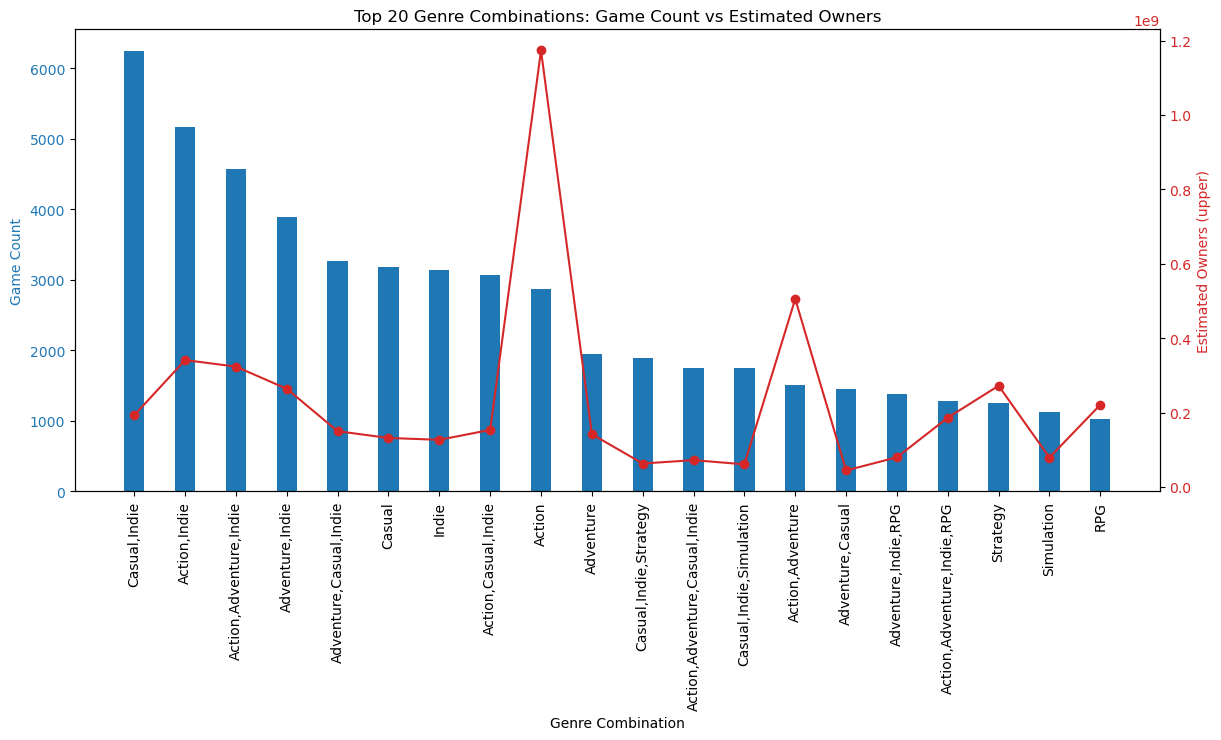

In [27]:
genre_counts = genres_series.value_counts().head(20)

filtered = steam_games[steam_games['Genres'].isin(top_20_genres)]
ownership_by_combo = filtered.groupby('Genres')['Estimated owners (upper)'].sum()

genres = genre_counts.index.tolist()
game_counts = genre_counts.values
owner_totals = [ownership_by_combo.get(g, 0) for g in genres]

x = range(len(genres))
fig, ax1 = plt.subplots(figsize=(14, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Genre Combination')
ax1.set_ylabel('Game Count', color=color1)
ax1.bar(x, game_counts, width=0.4, color=color1, align='center', label='Game Count')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(x)
ax1.set_xticklabels(genres, rotation=90)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Estimated Owners (upper)', color=color2)
ax2.plot(x, owner_totals, color=color2, marker='o', label='Estimated Owners')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Top 20 Genre Combinations: Game Count vs Estimated Owners')
plt.show()

1. ✅ Do higher user scores correlate with more estimated owners?
 - No, in fact there is no correlation between user scores and estimated owner amounts. 

2. ✅ Did certain years see a surge in high-rated games?
- If we would look into data without additional context - then yes, in 2020 there were more higher rated games compared to any other game release year. But if taking overal context into consideration - this might not be accurate. 

3. ✅ What release year games are available on steam the most?
- At the moment it's 2024, but seems that this might be a trend as each year there are more and more games being released and available on Steam. 

4. ✅ What games have most positive review (per each release year)? 
- 2021                           Valheim
- 2022                        ELDEN RING
- 2023                    Lethal Company
- 2024                Black Myth: Wukong
- 2025                        Schedule I

5. ✅ Is it possible that games with most positive reviews also might have most negative ones too? 
- Yes, that is the case - strong correlation coefficient found.

6. ✅ Price comparison of games per their release year. 
-It is not deffinitive, as games tend to become cheaper with time, but we can still see that at least on Steam after 2015 when new released games amount significantly started increasing - the price median became very stable. 

7. ✅ Does price affect estimate owner numbers? 
- In general - yes if we look into total owner count per each price range, but if we calculate the rate of average owners per game - it seems that middle part 50-60 has the largest owner rate per game. 

8. ✅ What are the most common genre combinations?
- Casual,Indie 
- Action,Indie 
- Action,Adventure,Indie
- Adventure,Indie
- Adventure,Casual,Indie

9. ✅ How does estimated ownership vary across genres?
- It is visible that even thought Casual,Indie or Action,Indie are most common - the most owned game genres are plain Action or Action adventure.


In [ ]:
git clone 

SyntaxError: invalid syntax (1601672198.py, line 1)